# Numpy: Operations with multidimensional data

This notebook is based (with some modifications) on a [NumPy tutorial](https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-2-Numpy.ipynb) by J.R. Johansson

In [0]:
# Import MatPlotlib so we can look at some pretty plots
# The reson for doing this will become clear in out MatPlotLib lecture next week
%matplotlib inline
import matplotlib.pyplot as plt

## Introduction

-------

The numpy package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good.

To use numpy you need to import the module, using for example:

In [0]:
from numpy import *

In the numpy package the terminology used for vectors, matrices and higher-dimensional data sets is array.

## Creating numpy arrays

-------

There are a number of ways to initialize new numpy arrays, for example from

 - a Python list or tuples
 - using functions that are dedicated to generating numpy arrays, such as arange, linspace, etc.
 - reading data from files

### From lists
For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [3]:
# a vector: the argument to the array function is a Python list
vector = array([1,2,3,4])

vector

array([1, 2, 3, 4])

In [4]:
# a matrix: the argument to the array function is a nested Python list
matrix = array([[1, 2], [3, 4]])

matrix

array([[1, 2],
       [3, 4]])

The `v` and `M` objects are both of the type ndarray that the numpy module provides:

In [5]:
type(vector), type(matrix)

(numpy.ndarray, numpy.ndarray)

The difference between the v and M arrays is only their shapes. We can get information about the shape of an array by using the `ndarray.shape` property:

In [6]:
vector.shape

(4,)

In [7]:
matrix.shape

(2, 2)

The number of elements in the array is available through the `ndarray.size` property:

In [8]:
matrix.size

4

Equivalently, we could use the function `numpy.shape` and `numpy.size`:

In [9]:
shape(matrix)

(2, 2)

In [10]:
size(matrix)

4

So far the `numpy.ndarray` looks awefully much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type?

There are several reasons:

 - Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementing such functions for Python lists would not be very efficient because of the dynamic typing.
 - Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when the array is created.
 - Numpy arrays are memory efficient.
 - Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of numpy arrays can be implemented in a compiled language (C and Fortran is used).
Using the `dtype` (data type) property of an ndarray, we can see what type the data of an array has:

In [11]:
matrix.dtype

dtype('int64')

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [12]:
matrix[0,0] = "hello"

ValueError: ignored

If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument:

In [13]:
matrix = array([[1, 2], [3, 4]], dtype=float)

matrix

array([[1., 2.],
       [3., 4.]])

Common data types that can be used with dtype are: `int`, `float`, `complex`, `bool`, etc.

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`.



### Using array-generating functions
For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in numpy that generate arrays of different forms. Some of the more common are:

**`arange`**


In [14]:
# create a range

x = arange(0, 10, 1) # arguments: start, stop, step

x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
x = arange(-1, 1, 0.1)

x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

**`linspace`** and **`logspace`**

In [16]:
# using linspace, both end points ARE included
linspace(0, 10, 25)

array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])

In [17]:
logspace(0, 10, 10, base=e)

array([1.00000000e+00, 3.03773178e+00, 9.22781435e+00, 2.80316249e+01,
       8.51525577e+01, 2.58670631e+02, 7.85771994e+02, 2.38696456e+03,
       7.25095809e+03, 2.20264658e+04])

**`mgrid`**

In [0]:
x, y = mgrid[0:5, 0:5]

In [19]:
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [20]:
y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

**random data**

In [0]:
from numpy import random

In [22]:
# uniform random numbers in [0,1]
random.rand(5,5)

array([[0.21945436, 0.62624846, 0.97543708, 0.91659586, 0.05087643],
       [0.85066713, 0.40131735, 0.92901423, 0.7290399 , 0.4865608 ],
       [0.99773362, 0.91392274, 0.52564316, 0.31194802, 0.00125373],
       [0.09657073, 0.63590692, 0.108349  , 0.87094351, 0.77787512],
       [0.01861538, 0.59028367, 0.71633518, 0.64032698, 0.04627364]])

In [23]:
# standard normal distributed random numbers
random.randn(5,5)

array([[ 0.12878719,  0.45482   ,  1.52306474, -0.48435756, -0.33684215],
       [-1.73251566,  1.29174573, -0.03475216,  1.33053552, -0.01993783],
       [-0.25453968, -2.51760018, -0.35529236, -1.85664153, -0.14323059],
       [-0.26209276, -0.60025684, -1.02809143, -0.47193277, -0.72903407],
       [-1.14414615,  0.38396338,  0.43796546,  0.24856281, -0.8907877 ]])

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


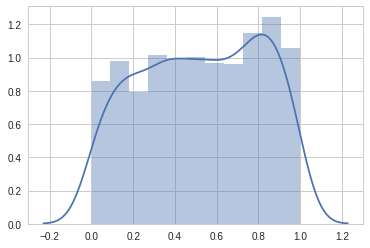

In [25]:
# Let's plot uniform distribution

x = random.rand(1000)
sns.set_style('whitegrid')
sns.distplot(x)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


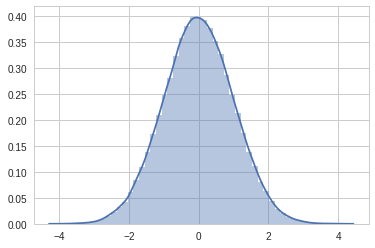

In [26]:
# Let's plot normal distribution

x = random.randn(100000)
sns.set_style('whitegrid')
sns.distplot(x)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


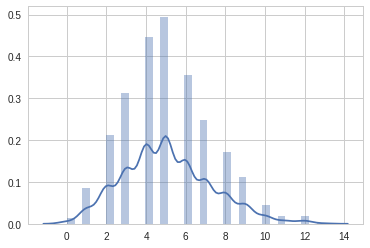

In [27]:
# Let's plot poisson distribution

x = random.poisson(5, 1000)
sns.set_style('whitegrid')
sns.distplot(x)

**`diag`**

In [28]:
# a diagonal matrix
diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [29]:
# diagonal with offset from the main diagonal
diag([1,2,3], k=1)

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

**zeroes** and **ones**

In [30]:
zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [31]:
ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## File IO

### Comma-separated values (CSV)
A very common file format for data files is comma-separated values (CSV), or related formats such as TSV (tab-separated values). To read data from such files into Numpy arrays we can use the `numpy.genfromtxt` function. For example:

In [32]:
!wget https://raw.githubusercontent.com/jrjohansson/scientific-python-lectures/master/stockholm_td_adj.dat

--2019-01-23 18:17:43--  https://raw.githubusercontent.com/jrjohansson/scientific-python-lectures/master/stockholm_td_adj.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2864946 (2.7M) [text/plain]
Saving to: ‘stockholm_td_adj.dat’

stockholm_td_adj.da 100%[===================>]   2.73M  --.-KB/s    in 0.06s   

2019-01-23 18:17:43 (43.9 MB/s) - ‘stockholm_td_adj.dat’ saved [2864946/2864946]



In [33]:
!head stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1
1800  1  4   -19.3   -19.3   -19.3 1
1800  1  5   -16.8   -16.8   -16.8 1
1800  1  6   -11.4   -11.4   -11.4 1
1800  1  7    -7.6    -7.6    -7.6 1
1800  1  8    -7.1    -7.1    -7.1 1
1800  1  9   -10.1   -10.1   -10.1 1
1800  1 10    -9.5    -9.5    -9.5 1


In [0]:
data = genfromtxt('stockholm_td_adj.dat')

In [35]:
data.shape

(77431, 7)

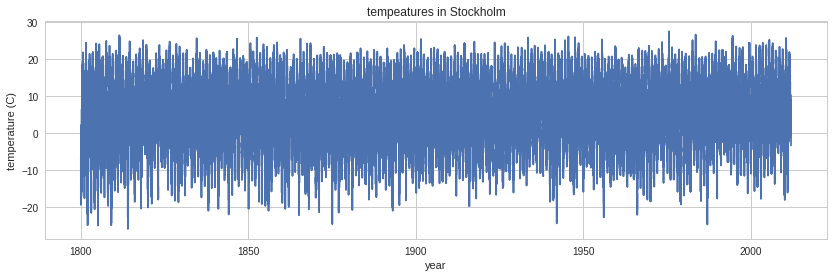

In [36]:
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,5])
ax.axis('tight')
ax.set_title('tempeatures in Stockholm')
ax.set_xlabel('year')
ax.set_ylabel('temperature (C)');

Using `numpy.savetxt` we can store a Numpy array to a file in CSV format:

In [37]:
M = random.rand(3,3)

M

array([[0.15899226, 0.73913852, 0.0858632 ],
       [0.41821712, 0.11712784, 0.34176831],
       [0.52685163, 0.12873943, 0.92178189]])

In [0]:
savetxt("random-matrix.csv", M)


In [39]:
!cat random-matrix.csv

1.589922582398127782e-01 7.391385219751671620e-01 8.586320111848333436e-02
4.182171214227743405e-01 1.171278378058918657e-01 3.417683058329642476e-01
5.268516328643041424e-01 1.287394330466531400e-01 9.217818880426476014e-01


In [40]:
savetxt("random-matrix.csv", M, fmt='%.5f') # fmt specifies the format

!cat random-matrix.csv

0.15899 0.73914 0.08586
0.41822 0.11713 0.34177
0.52685 0.12874 0.92178


### Numpy's native file format
Useful when storing and reading back numpy array data. Use the functions `numpy.save` and `numpy.load`:

In [41]:
save("random-matrix.npy", M)

!ls -lh *

-rw-r--r-- 1 root root   72 Jan 23 18:19 random-matrix.csv
-rw-r--r-- 1 root root  200 Jan 23 18:19 random-matrix.npy
-rw-r--r-- 1 root root 2.8M Jan 23 18:17 stockholm_td_adj.dat

sample_data:
total 55M
-r-xr-xr-x 1 root root 1.7K Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root 295K Jan  8 17:14 california_housing_test.csv
-rw-r--r-- 1 root root 1.7M Jan  8 17:14 california_housing_train.csv
-rw-r--r-- 1 root root  18M Jan  8 17:15 mnist_test.csv
-rw-r--r-- 1 root root  35M Jan  8 17:15 mnist_train_small.csv
-r-xr-xr-x 1 root root  903 Jan  1  2000 README.md


## Manipulating arrays
--------

### Indexing
We can index elements in an array using square brackets and indices:

In [42]:
# vector, and has only one dimension, taking one index
vector[0]

1

In [43]:
# matrix is a 2 dimensional array, taking two indices 
matrix[1,1]

4.0

If we omit an index of a multidimensional array it returns the whole row (or, in general, a `N-1` dimensional array)



In [44]:
matrix

array([[1., 2.],
       [3., 4.]])

In [45]:
matrix[1]

array([3., 4.])

The same thing can be achieved with using `:` instead of an index:



In [46]:
matrix[1,:] #row 1

array([3., 4.])

In [47]:
matrix[:,1] #column 1

array([2., 4.])

We can assign new values to elements in an array using indexing:

In [0]:
matrix[1,1] = 1

In [49]:
matrix

array([[1., 2.],
       [3., 1.]])

In [0]:
# also works for rows and columns
matrix[1,:] = 0
matrix[:,1] = -1

In [51]:
matrix

array([[ 1., -1.],
       [ 0., -1.]])

### Index slicing

Index slicing is the technical name for the syntax `M[lower:upper:step]` to extract part of an array:



In [52]:
A = array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [53]:
A[1:3] = [-2,-3]

A

array([ 1, -2, -3,  4,  5])

In [54]:
A[::] # lower, upper, step all take the default values

array([ 1, -2, -3,  4,  5])

In [55]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

In [56]:
A[:3] # first three elements

array([ 1, -2, -3])

In [57]:
A[3:] # elements from index 3

array([4, 5])

Negative indices counts from the end of the array (positive index from the begining):

In [0]:
A = array([1,2,3,4,5])

In [59]:
A[-1] # the last element in the array

5

In [60]:
A[-3:] # the last three elements


array([3, 4, 5])

Index slicing works exactly the same way for multidimensional arrays:


In [61]:
A = array([[n+m*10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [62]:
# a block from the original array
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [63]:
# strides
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

### Fancy indexing
Fancy indexing is the name for when an array or list is used in-place of an index:

In [64]:
row_indices = [1, 2, 3]
A[row_indices]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [65]:
col_indices = [1, 2, -1] # remember, index -1 means the last element
A[row_indices, col_indices]

array([11, 22, 34])

We can also use index masks: If the index mask is an Numpy array of data type `bool`, then an element is selected (True) or not (False) depending on the value of the index mask at the position of each element:

In [66]:
B = array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [67]:
row_mask = array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [68]:
# same thing
row_mask = array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

This feature is very useful to conditionally select elements from an array, using for example comparison operators:

In [69]:
x = arange(0, 10, 0.5)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [70]:
mask = (5 < x) * (x < 7.5)
mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [72]:
x[mask]

array([5.5, 6. , 6.5, 7. ])

In [73]:
( 5 < x ) * (x < 7.5)

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False])

### Functions for extracting data from arrays and creating arrays

#### where
The index mask can be converted to position index using the where function

In [74]:
indices = where(mask)

indices

(array([11, 12, 13, 14]),)

In [75]:
x[indices] # this indexing is equivalent to the fancy indexing x[mask]

array([5.5, 6. , 6.5, 7. ])

####diag
With the diag function we can also extract the diagonal and subdiagonals of an array:

In [76]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [77]:
diag(A)

array([ 0, 11, 22, 33, 44])

In [78]:
diag(A, -1)

array([10, 21, 32, 43])

#### take
The `take` function is similar to fancy indexing described above:

In [79]:
v2 = arange(-3,3)
v2

array([-3, -2, -1,  0,  1,  2])

In [80]:
row_indices = [1, 3, 5]
v2[row_indices] # fancy indexing

array([-2,  0,  2])

In [81]:
v2.take(row_indices)

array([-2,  0,  2])

But take also works on lists and other objects:


In [82]:
take([-3, -2, -1,  0,  1,  2], row_indices)

array([-2,  0,  2])

####choose
Constructs an array by picking elements from several arrays:

In [83]:
which = [1, 0, 1, 0]
choices = [[1,2,3,4], [-1,-2,-3,-4]]

choose(which, choices)

array([-1,  2, -3,  4])

## Linear algebra
--------
Vectorizing code is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.

### Scalar-array operations
We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [0]:
v1 = arange(0, 5)

In [85]:
v1

array([0, 1, 2, 3, 4])

In [86]:
v1 * 2

array([0, 2, 4, 6, 8])

In [87]:
v1 + 2

array([2, 3, 4, 5, 6])

In [88]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [89]:
A * 2

array([[ 0,  2,  4,  6,  8],
       [20, 22, 24, 26, 28],
       [40, 42, 44, 46, 48],
       [60, 62, 64, 66, 68],
       [80, 82, 84, 86, 88]])

In [90]:
A + 2

array([[ 2,  3,  4,  5,  6],
       [12, 13, 14, 15, 16],
       [22, 23, 24, 25, 26],
       [32, 33, 34, 35, 36],
       [42, 43, 44, 45, 46]])

### Element-wise array-array operations
When we add, subtract, multiply and divide arrays with each other, the default behaviour is element-wise operations:

In [91]:
v1 * v1

array([ 0,  1,  4,  9, 16])

In [92]:
A * A

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

If we multiply arrays with compatible shapes, we get an element-wise multiplication of each row:

In [93]:
A.shape

(5, 5)

In [94]:
v1.shape

(5,)

In [95]:
v1

array([0, 1, 2, 3, 4])

In [96]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [97]:
A * v1

array([[  0,   1,   4,   9,  16],
       [  0,  11,  24,  39,  56],
       [  0,  21,  44,  69,  96],
       [  0,  31,  64,  99, 136],
       [  0,  41,  84, 129, 176]])

In [98]:
v1 * A

array([[  0,   1,   4,   9,  16],
       [  0,  11,  24,  39,  56],
       [  0,  21,  44,  69,  96],
       [  0,  31,  64,  99, 136],
       [  0,  41,  84, 129, 176]])

### Matrix algebra
What about matrix mutiplication? There are two ways. We can either use the dot function, which applies a matrix-matrix, matrix-vector, or inner vector multiplication to its two arguments:

Dot multiplication:

$a\cdot b=\sum_{i=1}^n a_n b_n = a_1 b_1 + a_2 b_2 + ... + a_n b_n$

In [99]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [100]:
dot(A,A)

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [0]:
t = array([[1,2],[3,4]])

In [102]:
t

array([[1, 2],
       [3, 4]])

In [103]:
dot(t,t)

array([[ 7, 10],
       [15, 22]])

In [104]:
z = array([1,2,3])
dot(z,z)

14

In [105]:
dot([1,2],[1,3])

7

In [106]:
v1

array([0, 1, 2, 3, 4])

In [107]:
dot(A,v1)

array([ 30, 130, 230, 330, 430])

In [0]:
from numpy.linalg import *

In [109]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [0]:
a = array([[[1., 2.], [3., 4.]], [[1, 3], [3, 5]]])

### Data processing
Often it is useful to store datasets in Numpy arrays. Numpy provides a number of functions to calculate statistics of datasets in arrays.

For example, let's calculate some properties from the Stockholm temperature dataset used above.

In [112]:
# reminder, the tempeature dataset is stored in the data variable:
shape(data)

(77431, 7)

####mean

In [113]:
# the temperature data is in column 3
mean(data[:,3])

6.197109684751585

The daily mean temperature in Stockholm over the last 200 years has been about 6.2 C.



#### SD and variance

In [114]:
std(data[:,3]), var(data[:,3])

(8.282271621340573, 68.59602320966341)

####min and max

In [115]:
# lowest daily average temperature
data[:,3].min()

-25.8

In [116]:
# highest daily average temperature
data[:,3].max()

28.3

#### sum, prod, and trace

In [117]:
d = arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [118]:
# sum up all elements
sum(d)

45

In [119]:
# product of all elements
prod(d+1)

3628800

In [120]:
d+1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [121]:
# cummulative product
cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [122]:
# same as: diag(A).sum()
trace(A)

110

### Calculations with higher-dimensional data
When functions such as min, max, etc. are applied to a multidimensional arrays, it is sometimes useful to apply the calculation to the entire array, and sometimes only on a row or column basis. Using the axis argument we can specify how these functions should behave:

In [123]:
m = random.rand(3,3)
m

array([[0.33829171, 0.40448773, 0.53537406],
       [0.70139575, 0.82815424, 0.75878347],
       [0.52038369, 0.03975169, 0.67270888]])

In [124]:
# global max
m.max()

0.8281542387464986

In [125]:
# max in each column
m.max(axis=0)

array([0.70139575, 0.82815424, 0.75878347])

In [126]:
# max in each row
m.max(axis=1)

array([0.53537406, 0.82815424, 0.67270888])

Many other functions and methods in the array and matrix classes accept the same (optional) axis keyword argument.

## Reshaping, resizing and stacking arrays
----------
The shape of an Numpy array can be modified without copying the underlaying data, which makes it a fast operation even for large arrays.

In [127]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [128]:
A.shape

(5, 5)

In [0]:
n, m = A.shape

In [0]:
B = A.reshape((1,n*m))

In [131]:
B

array([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30,
        31, 32, 33, 34, 40, 41, 42, 43, 44]])

In [0]:
B[0,0:5] = 5

In [133]:
B

array([[ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30,
        31, 32, 33, 34, 40, 41, 42, 43, 44]])

In [134]:
A

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

We can also use the function `flatten` to make a higher-dimensional array into a vector. But this function create a copy of the data.

In [135]:
B = A.flatten()

B

array([ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [136]:
B[0:5] = 10

B

array([10, 10, 10, 10, 10, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [137]:
A

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

### Adding a new dimension: newaxis
With `newaxis`, we can insert new dimensions in an array, for example converting a vector to a column or row matrix:

In [0]:
v = array([1,2,3])

In [139]:
shape(v)


(3,)

In [140]:
# make a column matrix of the vector v
v[:, newaxis]

array([[1],
       [2],
       [3]])

In [141]:
v[newaxis,:]

array([[1, 2, 3]])

In [142]:
v[newaxis,:].shape

(1, 3)

### Stacking and repeating arrays
Using function `repeat`,`tile`, `vstack`, `hstack`, and `concatenate` we can create larger vectors and matrices from smaller ones:

####tile and repeat

In [0]:
a = array([[1, 2], [3, 4]])

In [144]:
# repeat each element 3 times
repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [145]:
# tile the matrix 3 times 
tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

####concatenate

In [0]:
b = array([[5, 6]])

In [147]:
concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [148]:
b.T

array([[5],
       [6]])

In [149]:
concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

####vertical and horizontal stack

In [150]:
vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [151]:
hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Copy versus "deep copy"
-------
To achieve high performance, assignments in Python usually do not copy the underlaying objects. This is important for example when objects are passed between functions, to avoid an excessive amount of memory copying when it is not necessary (technical term: pass by reference).

In [152]:
A = array([[1, 2], [3, 4]])

A

array([[1, 2],
       [3, 4]])

In [0]:
# now B is referring to the same array data as A 
B = A

In [154]:
# changing B affects A
B[0,0] = 10

B

array([[10,  2],
       [ 3,  4]])

In [155]:
A

array([[10,  2],
       [ 3,  4]])

If we want to avoid this behavior, so that when we get a new completely independent object B copied from A, then we need to do a so-called "deep copy" using the function `copy`:

In [0]:
B = copy(A)

In [157]:
# now, if we modify B, A is not affected
B[0,0] = -5

B

array([[-5,  2],
       [ 3,  4]])

In [158]:
A

array([[10,  2],
       [ 3,  4]])

## Iterating over array elements
------
Generally, we want to avoid iterating over the elements of arrays whenever we can (at all costs). The reason is that in a interpreted language like Python (or MATLAB), iterations are really slow compared to vectorized operations.

However, sometimes iterations are unavoidable. For such cases, the Python `for` loop is the most convenient way to iterate over an array:

In [159]:
v = array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


In [160]:
M = array([[1,2], [3,4]])

for row in M:
    print("row", row)
    
    for element in row:
        print(element)

row [1 2]
1
2
row [3 4]
3
4


When we need to iterate over each element of an array and modify its elements, it is convenient to use the `enumerate` function to obtain both the element and its index in the `for` loop:

In [161]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [162]:
# each element in M is now squared
M

array([[ 1,  4],
       [ 9, 16]])

## Using arrays in conditions
-------
When using arrays in conditions,for example if statements and other boolean expressions, one needs to use `any` or `all`, which requires that any or all elements in the array evalutes to `True`:

In [163]:
M

array([[ 1,  4],
       [ 9, 16]])

In [164]:
if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

at least one element in M is larger than 5


In [165]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

all elements in M are not larger than 5


In [166]:
M[any(M>5,axis=1)]

array([[ 9, 16]])

## Type casting
---------
Since Numpy arrays are statically typed, the type of an array does not change once created. But we can explicitly cast an array of some type to another using the `astype` functions (see also the similar `asarray` function). This always create a new array of new type:

In [167]:
M.dtype

dtype('int64')

In [168]:
M2 = M.astype(float)

M2

array([[ 1.,  4.],
       [ 9., 16.]])

In [169]:
M2.dtype

dtype('float64')

In [170]:
M3 = M.astype(bool)

M3

array([[ True,  True],
       [ True,  True]])

## Homework 1 with numpy

In [171]:
# Get the datasets
!wget https://nekrut.github.io/BMMB554/yeast_genes.txt

--2019-01-23 18:23:32--  https://nekrut.github.io/BMMB554/yeast_genes.txt
Resolving nekrut.github.io (nekrut.github.io)... 185.199.109.153, 185.199.110.153, 185.199.111.153, ...
Connecting to nekrut.github.io (nekrut.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236742 (231K) [text/plain]
Saving to: ‘yeast_genes.txt’

yeast_genes.txt     100%[===================>] 231.19K  --.-KB/s    in 0.03s   

2019-01-23 18:23:32 (7.88 MB/s) - ‘yeast_genes.txt’ saved [236742/236742]



In [172]:
!cut -f 3 yeast_genes.txt | sort | uniq -c

    131 chrI
    485 chrII
    253 chrIII
    889 chrIV
    264 chrIX
     58 chrmt
      1 chrom
    360 chrV
    161 chrVI
    642 chrVII
    340 chrVIII
    438 chrX
    375 chrXI
    644 chrXII
    551 chrXIII
    459 chrXIV
    640 chrXV
    548 chrXVI


In [173]:
# First let's find out how many chromosomes:
chrom = []
for line in open('yeast_genes.txt','r'):
  if not line.startswith('#'): # ignore header
    chrom.append(line.split('\t')[2]) #split line on tabs and access the third [2] element
set(chrom)

{'chrI',
 'chrII',
 'chrIII',
 'chrIV',
 'chrIX',
 'chrV',
 'chrVI',
 'chrVII',
 'chrVIII',
 'chrX',
 'chrXI',
 'chrXII',
 'chrXIII',
 'chrXIV',
 'chrXV',
 'chrXVI',
 'chrmt'}

In [0]:
# Let's create two arrays to translate between roman and integer
# The trick here is than index of every element can be used to
# Translate roman into integer
# For example, chr_roman[1] is 'chrI'

chr_roman = ['chrmt',
 'chrI',       
 'chrII',
 'chrIII',
 'chrIV',
 'chrIX',
 'chrV',
 'chrVI',
 'chrVII',
 'chrVIII',
 'chrX',
 'chrXI',
 'chrXII',
 'chrXIII',
 'chrXIV',
 'chrXV',
 'chrXVI']

In [175]:
chr_roman.index('chrI')

1

In [0]:
# Process the dataset

names = [] # Initialize array for gene names
coord = [] # Initialize array for coordinate data

for line in open('yeast_genes.txt','r'):
  if not line.startswith('#'): # ignore header
    line = line.rstrip() # get rid of caret returns
    fields = line.split('\t') # split line on tabs to convert it into a list
    name = fields[0]
    chromosome = chr_roman.index(fields[2])
    start = int( fields[3] )
    end = int( fields[4] )
    length = end-start+1 # compute the length
    if name.split('-')[0].endswith('W'):
      strand = 1 # encode positive strand as 1
    elif name.split('-')[0].endswith('C'):
      strand = 2 # encode negative strand as 2
    else:        
      strand = 0 # encode unknown strand as 0
    names.append(name)
    coord.append([chromosome,start,end,length,strand])
      

In [177]:
coord[:2]

[[0, 61868, 62447, 580, 0], [0, 1, 11, 11, 0]]

In [178]:
names[:2]

['21S_rRNA_4', '9S_rRNA_1']

In [179]:
!head -n 3 yeast_genes.txt

#systematic_name	standard_name	chrom	start	end
21S_rRNA_4	21S_RRNA_4	chrmt	61868	62447
9S_rRNA_1	9S_RRNA_1	chrmt	1	11


In [0]:
# Convert coord array into numpy array
coord = array(coord)

In [181]:
coord[:2]

array([[    0, 61868, 62447,   580,     0],
       [    0,     1,    11,    11,     0]])

In [182]:
coord.dtype

dtype('int64')

In [0]:
# Convert names array into numpy array
names = array(names)

In [184]:
names[:2]

array(['21S_rRNA_4', '9S_rRNA_1'], dtype='<U10')

In [185]:
# The number of genes can be inferred from array shape
coord.shape


(7238, 5)

In [186]:
# You can see that the file as many lines + 1 (header)
!wc -l yeast_genes.txt

7239 yeast_genes.txt


In [187]:
# Longest gene is the max of the dufference between start and end
max(coord[:,2] - coord[:,1] + 1)

14733

In [188]:
# Or simply the maximum of the length column
max(coord[:,3])

14733

In [189]:
# Which gene is that?
# The index of this gene in coord array is:
argmax(coord[:,3])

4740

In [190]:
# It has the same index in names array:
names[4740]

'YLR106C'

In [191]:
# Shortest gene
min(coord[:,3])

1

In [192]:
# The number of genes on chromsome 10
shape(extract(coord[:,0] == 10,coord))

(438,)

In [193]:
# Longest gene on chromosome 10
max(extract(coord[:,0] == 10,coord[:,3]))

7413

In [194]:
# The number of genes of chromsome 1 that are on the + strand 
# (we encoded '+' as 1)
size(extract(coord[:,0] == 1, coord[:,4] == 1))

131

In [195]:
# The number of genes of chromsome 1 that are on the - strand 
# (we encoded '-' as 2)
size(extract(coord[:,0] == 2, coord[:,4] == 2))

485

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


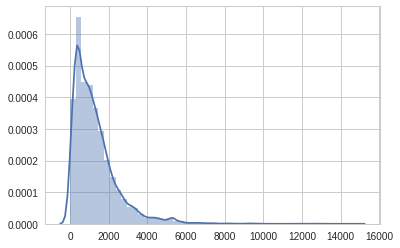

In [196]:
# Let's plot distribution of gene lengths
sns.set_style('whitegrid')
sns.distplot(coord[:,3])

##  A little fun with images
------
Images are really arrays

In [0]:
import matplotlib.pyplot as pl
import matplotlib.image as mpimg
import numpy as np

In [0]:
import imageio
img="https://nekrut.github.io/BMMB554/img/1N1A6336.CR2.jpg"
img = imageio.imread(img)

In [199]:
img.shape

(880, 1320, 3)

In [200]:
start_img[0]

NameError: ignored

(-0.5, 1319.5, 879.5, -0.5)

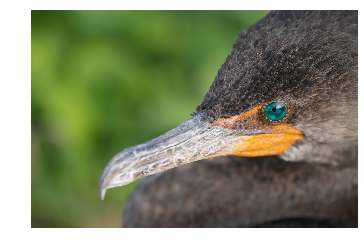

In [201]:
plt.imshow(img,cmap=plt.cm.gray)
plt.axis('off')

In [0]:
flip = np.flipud(img)

(-0.5, 1319.5, 879.5, -0.5)

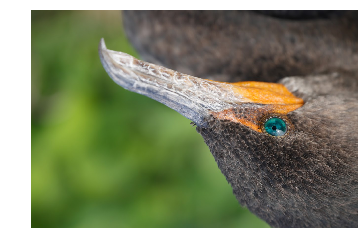

In [203]:
plt.imshow(flip)
plt.axis('off')